### Artificial Neural Network classification using scikit-learn

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning


In [3]:
digits = datasets.load_digits() # Classifying digits (0-9)
X = digits.data
y = digits.target

In [4]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


<Figure size 432x288 with 0 Axes>

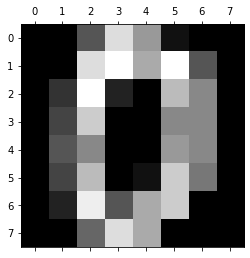

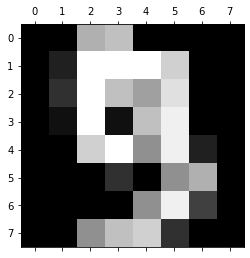

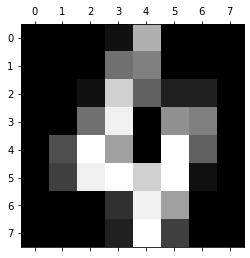

In [5]:
plt.gray()
plt.matshow(digits.images[0])
plt.matshow(digits.images[9])
plt.matshow(digits.images[4])
plt.show()

In [6]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=2)
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((1347, 64), (450, 64), (1347,), (450,))

In [7]:
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [8]:
clf = MLPClassifier(solver='sgd',activation='logistic',hidden_layer_sizes=20,learning_rate_init=0.1,random_state=2,max_iter=20)

clf.fit(Xtrain,ytrain)
# this example won't converge because of CI's time constraints, so we catch the warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,module='sklearn')
clf.fit(Xtrain, ytrain)

/home/pranjal/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pranjal/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=20, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
preds = clf.predict(Xtest)
print('Test set score:',clf.score(Xtest,ytest))

Test set score: 0.9488888888888889


In [10]:
count_misclassified = (ytest != preds).sum()
print('Misclassified samples: {} / {}'.format(count_misclassified,X.shape[0]))

Misclassified samples: 23 / 1797
